Since I don’t have the data for breathing measurements task, I will try to demonstrate face detection of OpenCV.

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap = None):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = cmap)

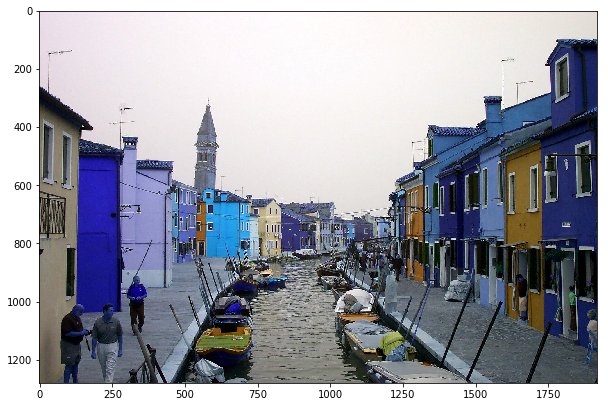

In [3]:
img = cv2.imread('Burano01.jpg')
display(img)

Face detection is basically a classification task so it’s trained to classify whether there is a target object or not. And Haar Feature-based Cascade Classifier is one of the face detection models available in OpenCV. This is a pre-trained model, which means it already completed training with thousands of images.

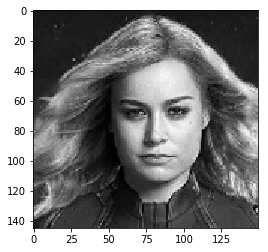

In [4]:
cap_mav= cv2.imread("CAPTAIN_MARVEL.png")
# Find the region of interest
roi = cap_mav[25:170, 100:250]
roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
plt.imshow(roi, cmap = 'gray')

In [10]:
# Load Cascade filter 
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

Next, we’re going to create a function detecting a face and drawing a rectangle around it. To detect the face, we can use the method face_cascade . It returns the four points of the identified region so we’ll draw a rectangle at that position. scaleFactor is a parameter for how much the image size is reduced at each image scale and minNeighbors for how many neighbors each candidate rectangle should be trained. Now let’s apply this function to the image and see the result.

(-0.5, 149.5, 144.5, -0.5)

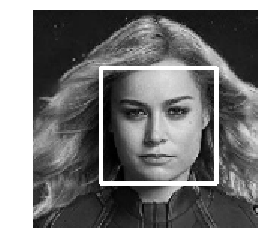

In [12]:
# Create the face detecting function 
def detect_face(img):
    
    img_2 = img.copy()
    face_rects = face_cascade.detectMultiScale(img_2, 
                                               scaleFactor = 1.1,
                                               minNeighbors = 3)
    
    for (x, y, w, h) in face_rects:
        cv2.rectangle(img_2, (x, y), (x+w, y+h), (255, 255, 255), 2)
        
    return img_2# Detect the face
roi_detected = detect_face(roi)
plt.imshow(roi_detected, cmap = 'gray')
plt.axis('off')

In [18]:
# Step 2. Call the computer cam
cap = cv2.VideoCapture(0) #0 means use the built in camera
# This is the point where we would feed the video file if we had any.
# for building breathing rate functions, I would use a video file

while True: 
    
    check, frame = cap.read(0) 
# check is a boolean that returns whether Python can read the video capture object
# frame is a NumPy array, represents the first image that video captures
# this loop continues as long as the check is true
     
    frame = detect_face(frame)
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) #this will generate a frame every 1 miliseconds
    if c == ord('q'): #to stop the process press 'q' on the keyboard
        break 
        
cap.release() #release the camera
cv2.destroyAllWindows()

In [16]:
print(frame) #This is the NumpyArray of our image

[[[255 237 211]
  [255 231 205]
  [255 234 208]
  ...
  [254 254 252]
  [244 247 242]
  [230 233 228]]

 [[255 244 218]
  [255 245 219]
  [255 240 214]
  ...
  [249 250 247]
  [241 245 240]
  [241 245 240]]

 [[255 255 230]
  [255 255 232]
  [255 250 222]
  ...
  [235 243 237]
  [236 244 239]
  [246 254 249]]

 ...

 [[158 147 166]
  [158 147 166]
  [157 149 163]
  ...
  [126 129 138]
  [121 125 134]
  [119 124 133]]

 [[160 143 165]
  [162 146 168]
  [165 149 171]
  ...
  [116 124 130]
  [119 126 134]
  [120 127 135]]

 [[160 143 165]
  [158 142 164]
  [165 149 171]
  ...
  [115 123 129]
  [116 123 132]
  [115 122 131]]]


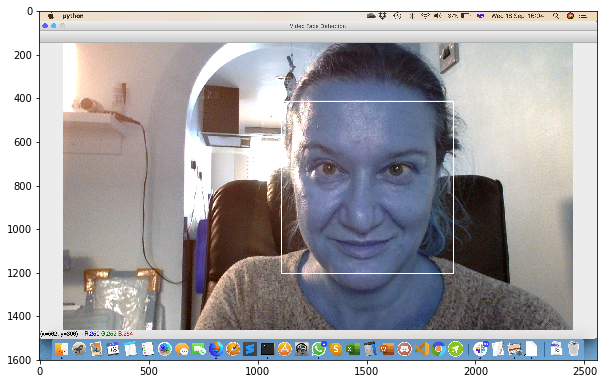

In [4]:
def display(img, cmap = None):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = cmap)
img = cv2.imread('Screenshot 2019-09-18 at 16.04.58.png')
display(img)

FOR MOTION DETECTION WE NEED TO FOLLOW THE STEPS:
1- capture image in a frame
2-Convert to Gaussian blur image
3-take more frames of the onject
4-calculate the difference to detect motion
5-Define a threshold to remove shadows and noise
6- Define the borders of the object
7- Add a box frame around the object

In [5]:
# Capture video and set up the gaussian blur
first_frame= None
video = cv2.VideoCapture(0)

while True:
    check, frame = video.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (21,21),0)
    
    if first_frame is None:
        first_frame = gray
        continue

    delta_frame = cv2.absdiff(first_frame, gray)
    thresh_delta = cv2.threshold(delta_frame, 30, 255, cv2.THRESH_BINARY)[1]
    thresh_delta = cv2.dilate(thresh_delta, None, iterations=0)
    (cnts,_) = cv2.findContours(thresh_delta.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in cnts:
        if cv2.contourArea(contour) <1000:
            continue
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x,y), (x +w, y+h), (0, 255,0), 3)
    
    cv2.imshow('frame', frame)
    cv2.imshow('capture gray', gray)
    cv2.imshow('Delta', delta_frame)
    cv2.imshow('Threshold', thresh_delta)
    
    c = cv2.waitKey(1) #this will generate a frame every 1 miliseconds
    if c == ord('q'): #to stop the process press 'q' on the keyboard
        break 

print()
video.release() #release the camera
cv2.destroyAllWindows()
    